In [89]:
import pandas as pd
import scipy.stats as sps
from fitter import Fitter, get_common_distributions, get_distributions
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import f_classif, chi2
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score # for classification problem
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
import numpy as np
from numpy import mean
from numpy import std
from numpy import absolute

In [2]:
df = pd.read_csv('/Users/jennyhuang/Documents/jobs/DBC-AI Launch/project2-MDdataCleaning/data-explore/combine.csv')

In [3]:
dataset = df.values
dataset

array([[0, '4-5', 0, ..., 0, 3, 0],
       [1, '4-5', 0, ..., 0, 3, 0],
       [2, '4-5', 0, ..., 0, 3, 0],
       ...,
       [1386, '-1.0', 5, ..., 0, 2, 0],
       [1387, '-1.0', 5, ..., 0, 2, 0],
       [1388, '-1.0', 5, ..., 0, 2, 0]], dtype=object)

In [51]:
X_reg = dataset[:, [2, 3, 5, 6, 7, 8]]
y_reg = dataset[:, [1, 4]]

In [52]:
X_class_1 = dataset[:, [1, 2, 3, 5, 6, 7, 8]]
y_class_1 = dataset[:, 4] # review number
X_class_2 = dataset[:, [2, 3, 4, 5, 6, 7, 8]]
y_class_2 = dataset[:, 1] # sr-only

In [53]:
X_reg = X_reg.astype(str)
X_class_1 = X_class_1.astype(str)
X_class_2 = X_class_2.astype(str)

# classification method

In [54]:
X_train_class1, X_test_class1, y_train_class1, y_test_class1 = train_test_split(X_class_1, y_class_1, test_size=0.3, random_state=1) # 0.3 testing 0.7 for training
X_train_class2, X_test_class2, y_train_class2, y_test_class2 = train_test_split(X_class_2, y_class_2, test_size=0.3, random_state=1)

In [55]:
# summarize
for i in range(2):
    print('Train', vars()['X_train_class'+str(i+1)].shape, vars()['y_train_class'+str(i+1)].shape)
    print('Test', vars()['X_test_class'+str(i+1)].shape, vars()['y_test_class'+str(i+1)].shape)
# print('Train', X_train.shape, y_train.shape)
# print('Test', X_test.shape, y_test.shape)

Train (972, 7) (972,)
Test (417, 7) (417,)
Train (972, 7) (972,)
Test (417, 7) (417,)


In [8]:
# oe = OrdinalEncoder()
# oe.fit(X_train).categories_

In [56]:
# prepare input data use OrdinalEncoder
# OrdinalEncoder() from scikit-learn to encode each variable to integers
def prepare_inputs(X_train, X_test):
    oe = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
    oe.fit(X_train)
    X_train_enc = oe.transform(X_train)
    X_test_enc = oe.transform(X_test)
    return X_train_enc, X_test_enc
def prepare_targets(y_train, y_test):
    le = LabelEncoder()
    le.fit(y_train)
    y_train_enc = le.transform(y_train)
    y_test_enc = le.transform(y_test)
    return y_train_enc, y_test_enc

In [57]:
# X_train

In [58]:
# X_test

In [28]:
# y_train_enc1 = y_train[:, 0]
# y_test_enc1 = y_test[:, 0]

In [29]:
# y_train_enc2 = y_train[:, 1]
# y_test_enc2 = y_test[:, 1]

In [61]:
for i in range(2):
    vars()['X_train_enc'+str(i + 1)], vars()['X_test_enc'+str(i + 1)] = prepare_inputs(vars()['X_train_class'+str(i + 1)], vars()['X_test_class' + str(i + 1)]) 
    vars()['y_train_enc'+str(i + 1)], vars()['y_test_enc'+str(i + 1)] = prepare_targets(vars()['y_train_class'+str(i + 1)], vars()['y_test_class' + str(i + 1)]) 

In [30]:
# X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)
# y_train_enc1, y_test_enc1 = prepare_targets(y_train_enc1, y_test_enc1) # only for 1d array, we have 2d array in this case
# y_train_enc2, y_test_enc2 = prepare_targets(y_train_enc2, y_test_enc2)

In [62]:
X_train_enc1.shape

(972, 7)

In [63]:
y_train_enc1.shape

(972,)

In [64]:
y_train_enc2.shape

(972,)

In [65]:
def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=chi2, k='all')
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

Feature 0: 1032.803508
Feature 1: 33.323659
Feature 2: 7.047352
Feature 3: 11.722601
Feature 4: 15.529565
Feature 5: 5.348138
Feature 6: 15.305312


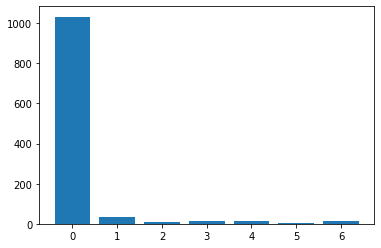

In [66]:
# feature selection for y_train_enc1 (review_number)
X_train_fs1, X_test_fs1, fs1 = select_features(X_train_enc1, y_train_enc1, X_test_enc1)
# what are scores for the features
for i in range(len(fs1.scores_)):
    print('Feature %d: %f' % (i, fs1.scores_[i]))
# plot the scores
plt.bar([i for i in range(len(fs1.scores_))], fs1.scores_)
plt.show()

Feature 0: 18.927337
Feature 1: 3.200193
Feature 2: 2779.373843
Feature 3: 5.726795
Feature 4: 6.159919
Feature 5: 1.793545
Feature 6: 3.085102


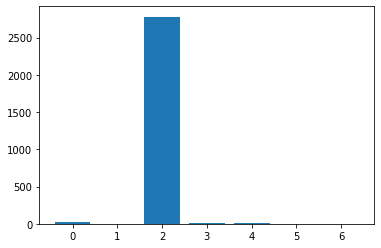

In [67]:
# feature selection for y_train_enc2 (sr-only)
X_train_fs2, X_test_fs2, fs2 = select_features(X_train_enc2, y_train_enc2, X_test_enc2)
# what are scores for the features
for i in range(len(fs2.scores_)):
    print('Feature %d: %f' % (i, fs2.scores_[i]))
# plot the scores
plt.bar([i for i in range(len(fs2.scores_))], fs2.scores_)
plt.show()

## decision tree classification model

In [68]:
# fit the model for review_number
model = DecisionTreeClassifier()
model.fit(X_train_fs1, y_train_enc1)
# evaluate the model
yhat = model.predict(X_test_fs1)
# evaluate predictions
accuracy = accuracy_score(y_test_enc1, yhat)
print('Accuracy: %.2f' % (accuracy*100)) # 79.38%
# error = mean_absolute_error(y_test_enc1, yhat)
# print('MAE: %.3f' % (error))

Accuracy: 79.38


In [69]:
# fit the model for sr-only
model = DecisionTreeClassifier()
model.fit(X_train_fs2, y_train_enc2)
# evaluate the model
yhat = model.predict(X_test_fs2)
# evaluate predictions
accuracy = accuracy_score(y_test_enc2, yhat)
print('Accuracy: %.2f' % (accuracy*100)) # 83.21%
# error = mean_absolute_error(y_test_enc1, yhat)
# print('MAE: %.3f' % (error))

Accuracy: 83.21


In [45]:
# fs = SelectKBest(score_func=chi2, k='all')
# fs.fit(X_train_enc, y_train_enc1)
# X_train_fs = fs.transform(X_train_enc)
# X_test_fs = fs.transform(X_test_enc)
# # the dataset need to be all numerical so I categorized location-info__office-loc 2 to numerical in data-exploration notebook

In [50]:
# rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=3)
# rfe.fit(X_train_enc, y_train_enc)
# X_train_enc, y_train_enc = rfe.transform(X_train_enc, y_train_enc) # Reduce X to the selected features when use OrdinalEncoder.

## try rfe with DecisionTreeClassifier

In [101]:
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=3)
model = DecisionTreeClassifier()
pipeline = Pipeline(steps=[('s',rfe),('m',model)])
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=2, n_repeats=3, random_state=1) # If your target variable is continuous then use simple KFold cross validation instead of StratifiedKFold.
n_scores = cross_val_score(pipeline, X_train_enc1, y_train_enc1, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

/Users/jennyhuang/yes/lib/python3.9/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/Users/jennyhuang/yes/lib/python3.9/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/Users/jennyhuang/yes/lib/python3.9/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


Accuracy: 0.804 (0.007)


In [109]:
rfe.fit(X_train_enc1, y_train_enc1)
# summarize all features
for i in range(X_train_enc1.shape[1]):
    print('Column: %d, Selected %s, Rank: %.3f' % (i, rfe.support_[i], rfe.ranking_[i]))

Column: 0, Selected True, Rank: 1.000
Column: 1, Selected True, Rank: 1.000
Column: 2, Selected True, Rank: 1.000
Column: 3, Selected False, Rank: 4.000
Column: 4, Selected False, Rank: 3.000
Column: 5, Selected False, Rank: 2.000
Column: 6, Selected False, Rank: 5.000


In [112]:
X_train_enc1.shape

(972, 7)

# regression method

In [71]:
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.3, random_state=1) # 0.3 testing 0.7 for training

In [81]:
X_train_enc, X_test_enc = prepare_inputs(X_train_reg, X_test_reg)
y_train_enc = np.append([y_train_enc1], [y_train_enc2], axis=0)

In [87]:
y_train_enc = y_train_enc.transpose()

## without feature selection(RFE)

In [95]:
model = DecisionTreeRegressor()
# evaluate model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1) # If your target variable is continuous then use simple KFold cross validation instead of StratifiedKFold.
n_scores = cross_val_score(model, X_train_enc, y_train_enc, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
n_scores = absolute(n_scores)
# report performance
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

MAE: 2.480 (0.134)


## with feature selection(RFE)

In [113]:
rfe = RFE(estimator=DecisionTreeRegressor(), n_features_to_select=3)
model = DecisionTreeRegressor()
pipeline = Pipeline(steps=[('s',rfe),('m',model)])
# evaluate model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X_train_enc, y_train_enc, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
n_scores = absolute(n_scores)
# report performance
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

MAE: 2.480 (0.136)


In [114]:
# # make a prediction for one example
# # fit the model on all available data
# pipeline.fit(X_train_enc, y_train_enc)
# yhat = pipeline.predict(X_test_enc)
# error = mean_absolute_error(y_test_enc, yhat)
# print('MAE: %.3f' % (error))
# # print('Predicted: %.3f' % (yhat))

In [115]:
# see the feature selection result
rfe.fit(X_train_enc, y_train_enc)
for i in range(X_train_enc.shape[1]):
    print('Column: %d, Selected %s, Rank: %.3f' % (i, rfe.support_[i], rfe.ranking_[i]))

Column: 0, Selected True, Rank: 1.000
Column: 1, Selected True, Rank: 1.000
Column: 2, Selected False, Rank: 4.000
Column: 3, Selected False, Rank: 2.000
Column: 4, Selected True, Rank: 1.000
Column: 5, Selected False, Rank: 3.000


# for sheet1

In [33]:
f = Fitter(df1['sr-only'])
f.fit()

/Users/jennyhuang/yes/lib/python3.9/site-packages/scipy/integrate/_quadpack_py.py:1225: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
/Users/jennyhuang/yes/lib/python3.9/site-packages/scipy/integrate/_quadpack_py.py:1225: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
wrapcauchy,32.405518,736.062167,-235.126293,inf,0.278481,2.510432e-11
levy_l,42.643123,650.609431,-196.811994,inf,0.341959,5.361267e-17
weibull_max,42.857869,619.654758,-190.955726,inf,0.306403,1.152080e-13
genhyperbolic,44.994138,794.911002,-173.144950,inf,NaN,NaN
johnsonsu,45.121250,1006.382371,-177.761811,inf,0.655678,4.569474e-67


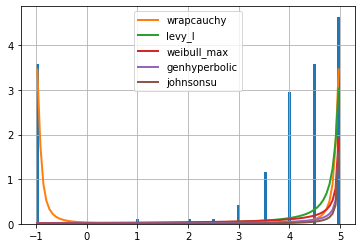

In [10]:
f.summary()

In [27]:
# # use Kolmogorov-Smirnov test to find out whether the rating info comes from wrapcauchy distribution
# ks = sps.kstest(df1['sr-only'], sps.wrapcauchy.cdf(0.99, 0.01))
# ks

In [41]:
# from sklearn.datasets import load_iris
# X, y = load_iris(return_X_y=True)
# len(y)

In [53]:
# df1.info()

In [52]:
sheet1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   provider-name__lnk               157 non-null    object 
 1   provider-details__specialty      157 non-null    object 
 2   sr-only                          158 non-null    float64
 3   star-rating__reviews             157 non-null    object 
 4   sr-only 2                        124 non-null    object 
 5   location-info__office-loc        157 non-null    object 
 6   location-info__office-loc 2      157 non-null    object 
 7   feats-of-strength__feat-title    120 non-null    object 
 8   feats-of-strength__feat-title 2  106 non-null    object 
 9   feats-of-strength__feat-title 3  104 non-null    object 
 10  location-info__distance 2        157 non-null    float64
 11  star-rating href                 33 non-null     object 
 12  review_number         

In [64]:
prep_x = sheet1[~sheet1['location-info__distance 2'].isna() & ~sheet1['review_number'].isna() &
               ~sheet1['provider_detail'].isna() & ~sheet1['feats'].isna() & ~sheet1['feats1'].isna() &
               ~sheet1['feats2'].isna()]

In [110]:
X = prep_x[['location-info__distance 2', 'review_number', 'provider_detail', 'feats', 'feats1', 'feats2']]
y = prep_x['sr-only']

In [35]:
fs = SelectKBest(score_func=f_classif, k=3)

In [113]:
X_selected = fs.fit_transform(X, y)

/Users/jennyhuang/yes/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [2] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)


In [114]:
fs.scores_

array([ 1.08704031,  0.96431002,         nan, 55.4916357 , 45.9511801 ,
       36.32494571])

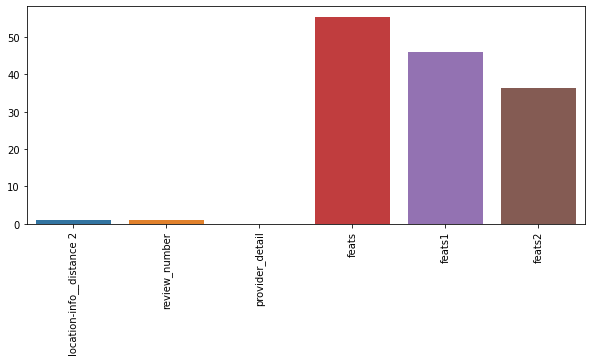

In [122]:
# what are scores for the features
names = []
values = []
for i in range(len(fs.scores_)):
    names.append(X.columns[i])
    values.append(fs.scores_[i])
lst = zip(names, values)

# plot the scores
plt.figure(figsize=(10,4))
sns.barplot(x=names, y=values)
plt.xticks(rotation = 90)
plt.show()

In [105]:
X_selected.shape

(157, 3)

In [106]:
X_selected

array([[2., 0., 3.],
       [0., 3., 4.],
       [0., 3., 4.],
       [0., 3., 4.],
       [2., 0., 3.],
       [0., 3., 4.],
       [0., 3., 1.],
       [0., 3., 4.],
       [0., 3., 4.],
       [2., 0., 3.],
       [0., 3., 4.],
       [0., 3., 4.],
       [0., 3., 4.],
       [0., 3., 4.],
       [0., 3., 4.],
       [0., 3., 4.],
       [0., 3., 4.],
       [2., 0., 3.],
       [2., 6., 6.],
       [0., 3., 4.],
       [0., 3., 4.],
       [0., 3., 4.],
       [0., 3., 4.],
       [0., 3., 4.],
       [0., 3., 4.],
       [2., 0., 3.],
       [2., 0., 3.],
       [0., 3., 4.],
       [0., 3., 4.],
       [0., 3., 4.],
       [2., 0., 3.],
       [0., 3., 4.],
       [0., 3., 4.],
       [2., 0., 3.],
       [2., 0., 3.],
       [0., 3., 4.],
       [0., 3., 4.],
       [0., 3., 4.],
       [0., 3., 4.],
       [0., 3., 4.],
       [0., 3., 4.],
       [0., 3., 1.],
       [0., 3., 4.],
       [0., 3., 1.],
       [2., 0., 3.],
       [0., 3., 4.],
       [0., 4., 5.],
       [0., 3

In [92]:
fs.get_feature_names_out

<bound method SelectorMixin.get_feature_names_out of SelectKBest(k='all')>

In [100]:
cols_idxs = fs.get_support(indices=True)

In [101]:
features_df_new = X.iloc[:,cols_idxs]

In [102]:
features_df_new

,location-info__distance 2,review_number,provider_detail,feats,feats1,feats2
0,11.5,51,0,2,0,3
1,12.8,303,0,0,3,4
2,12.8,69,0,0,3,4
3,0.2,39,0,0,3,4
4,18.3,25,0,2,0,3
...,...,...,...,...,...,...
152,98.6,-1,0,6,6,6
153,99.0,-1,0,6,6,6
154,100.0,-1,0,6,6,6
155,100.9,-1,0,6,6,6


In [98]:
dataframe = pd.DataFrame(X_selected)

In [ ]:
dataframe = pd.DataFrame(fit_transofrmed_features, columns=features_names)